In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
from treehopper.hoppers import hopper, treehopper, RPartition
import treehopper.explore as e
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from ipywidgets import interact
from sklearn.preprocessing import LabelEncoder
from copy import deepcopy

In [38]:
rgauss = np.random.normal(size=(1000,2))

In [134]:
h1 = hopper(rgauss)
h2 = hopper(rgauss)

In [135]:
h1.hop()

beginning traversal! 1000 items to traverse


[419]

In [136]:
h2.hop(10)

beginning traversal! 1000 items to traverse


[941, 678, 467, 495, 258, 387, 396, 284, 451, 795]

In [137]:
h2.get_vdict()

{941: [0,
  1,
  2,
  3,
  8,
  10,
  11,
  13,
  15,
  20,
  23,
  26,
  27,
  31,
  32,
  34,
  37,
  38,
  43,
  44,
  45,
  46,
  48,
  49,
  54,
  56,
  57,
  58,
  59,
  60,
  61,
  63,
  66,
  67,
  68,
  71,
  73,
  77,
  80,
  81,
  83,
  86,
  87,
  90,
  93,
  94,
  95,
  97,
  98,
  101,
  102,
  104,
  105,
  106,
  108,
  109,
  111,
  113,
  114,
  115,
  117,
  121,
  124,
  125,
  129,
  131,
  132,
  133,
  135,
  136,
  139,
  141,
  142,
  145,
  148,
  152,
  154,
  156,
  157,
  158,
  162,
  163,
  166,
  170,
  171,
  172,
  173,
  174,
  179,
  180,
  185,
  187,
  191,
  192,
  194,
  196,
  198,
  199,
  200,
  202,
  203,
  204,
  208,
  209,
  210,
  211,
  212,
  215,
  216,
  222,
  224,
  230,
  231,
  238,
  240,
  241,
  242,
  245,
  248,
  251,
  252,
  255,
  259,
  260,
  263,
  264,
  272,
  275,
  276,
  277,
  278,
  279,
  283,
  285,
  286,
  290,
  291,
  296,
  297,
  298,
  299,
  302,
  307,
  311,
  315,
  318,
  321,
  322,
  328,
  332,

In [42]:
h1>h2

False

In [43]:
th = treehopper(rgauss)
th.hop(2)

0
heap starting
radius inf
hopping with 1000 points
beginning traversal! 1000 items to traverse
1
radius 4.1832235662958865
hopping with 1000 points
r values: [3.660814917472981, 2.898783191918481]
splitting
beginning traversal! 933 items to traverse
beginning traversal! 67 items to traverse


In [44]:
th.get_vdict()

{631: [631,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  34,
  35,
  37,
  38,
  39,
  40,
  41,
  43,
  44,
  45,
  46,
  48,
  49,
  51,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  77,
  78,
  79,
  80,
  81,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  139,
  140,
  141,
  142,
  143,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  161,
  162,
  163,
  164,
  165,
  166,
  16

In [45]:
cells = th.get_vcells()

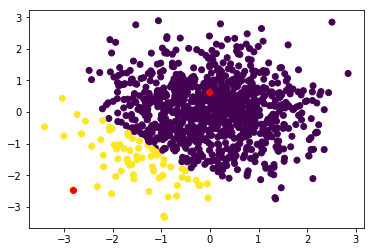

In [46]:
plt.scatter(rgauss[:,0],rgauss[:,1],c=cells)
plt.scatter(rgauss[th.path,0],rgauss[th.path,1],color='red')

In [47]:
th.get_vdict() 

{631: [631,
  0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  31,
  32,
  34,
  35,
  37,
  38,
  39,
  40,
  41,
  43,
  44,
  45,
  46,
  48,
  49,
  51,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  77,
  78,
  79,
  80,
  81,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  139,
  140,
  141,
  142,
  143,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  161,
  162,
  163,
  164,
  165,
  166,
  16

In [88]:

[len(p) for p in partitions]

[125, 125, 125, 125, 125, 125, 125, 125]

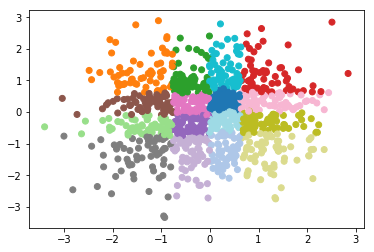

In [91]:
partitions = RPartition(rgauss, max_partition_size=100)
cells = np.array(range(rgauss.shape[0]))
for i,p in enumerate(partitions):
    for row in p:
        cells[row] = i
le = LabelEncoder()
cells = [str(x) for x in cells]
le.fit(cells)
cs = le.transform(cells)
plt.scatter(rgauss[:,0],rgauss[:,1], c=cs, cmap='tab20')

In [81]:
len(np.unique(partitions))

875

Pre-partitioning...
beginning traversal! 500 items to traverse
beginning traversal! 500 items to traverse
Pre-partitioning done, added 2 points
2
radius 4.045014876730432
hopping with 500 points
[0 1 2]


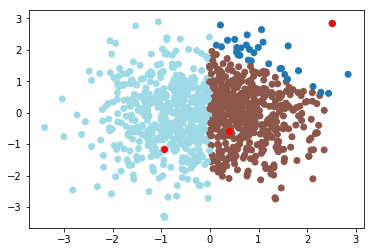

3
radius 4.041585216175501
hopping with 500 points
[0 1 2 3]


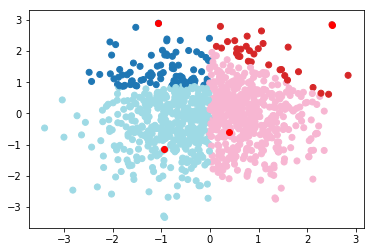

4
radius 2.6274916326441113
hopping with 500 points
[0 1 2 3 4]


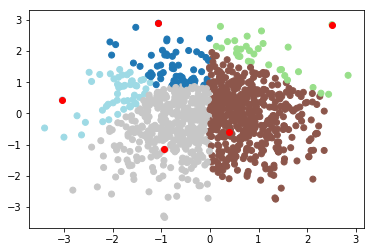

5
radius 2.574444559726371
hopping with 500 points
[0 1 2 3 4 5]


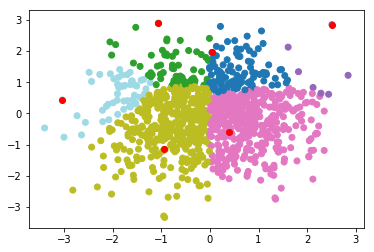

6
radius 2.353387472039053
hopping with 500 points
[0 1 2 3 4 5 6]


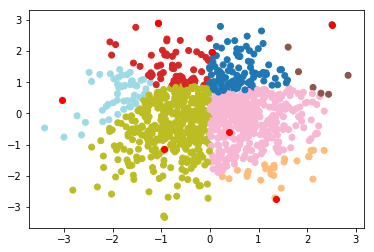

7
radius 2.290456378605063
hopping with 500 points
[0 1 2 3 4 5 6 7]


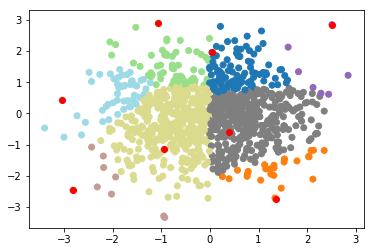

8
radius 2.2316850348089523
hopping with 500 points
[0 1 2 3 4 5 6 7 8]


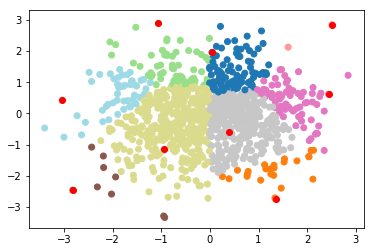

9
radius 2.195640925131623
hopping with 500 points
[0 1 2 3 4 5 6 7 8 9]


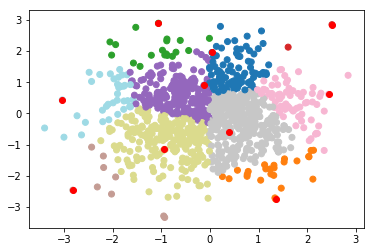

10
radius 2.083706533545192
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10]


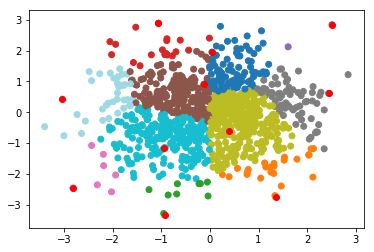

11
radius 1.802590865986691
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11]


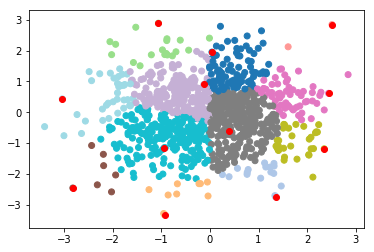

12
radius 1.5717052894467076
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


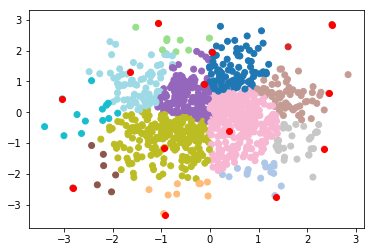

13
radius 1.4712845094071922
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


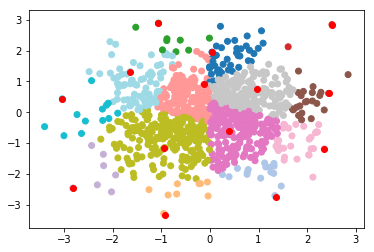

14
radius 1.4316572206834461
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


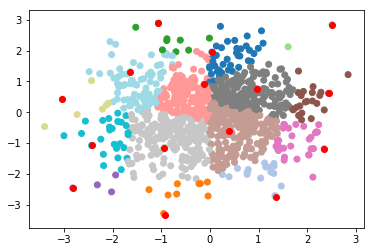

15
radius 1.3834341571365474
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


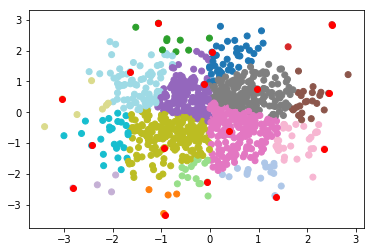

16
radius 1.3121833145342605
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


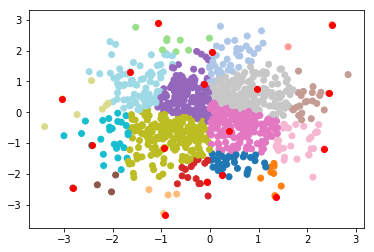

17
radius 1.2661287546325555
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


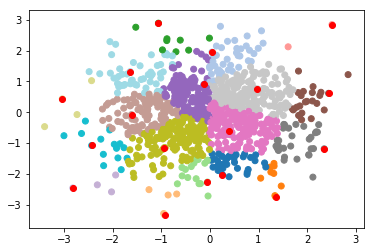

18
radius 1.2312983234485717
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


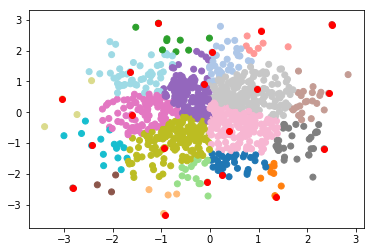

19
radius 1.1943809281162427
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


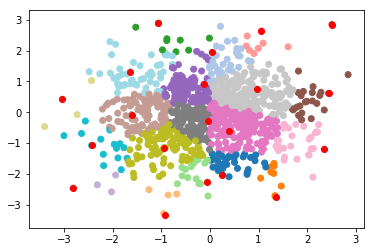

20
radius 1.1564971510251774
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


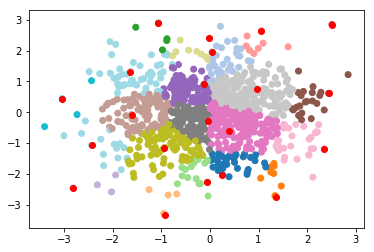

21
radius 1.1496453967591336
hopping with 500 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


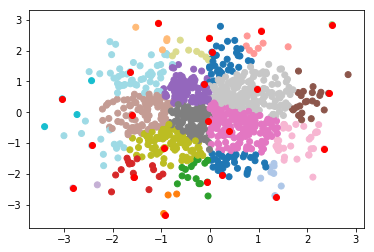

In [146]:
th = treehopper(rgauss, splits=float('inf'), pre_partition=True, max_partition_size=500)
for i in range(20):
    th.hop()
    cells = deepcopy([str(x) for x in th.get_vcells()])
    le = LabelEncoder()
    le.fit(cells)
    cells = le.transform(cells)
    
    #print(cells)
    print(np.unique(cells))
    plt.scatter(rgauss[:,0],rgauss[:,1],c=cells, cmap='tab20')
    plt.scatter(rgauss[th.path,0],rgauss[th.path,1],color='red')
    plt.show()

beginning traversal! 1000 items to traverse
[0]


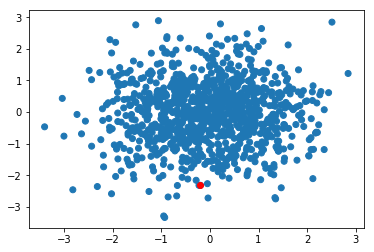

checking 339 points
[0 1]


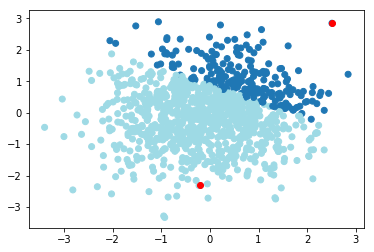

checking 419 points
[0 1 2]


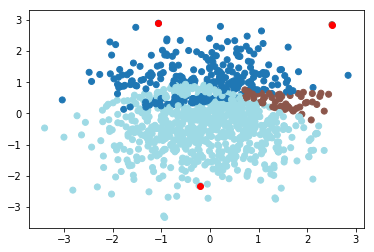

checking 438 points
[0 1 2 3]


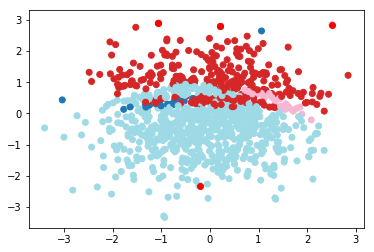

checking 520 points
[0 1 2 3 4]


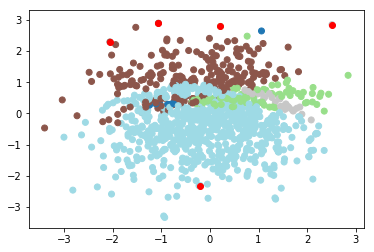

checking 439 points
[0 1 2 3 4 5]


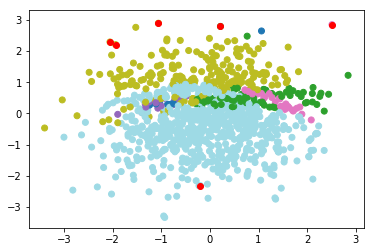

checking 559 points
[0 1 2 3 4 5 6]


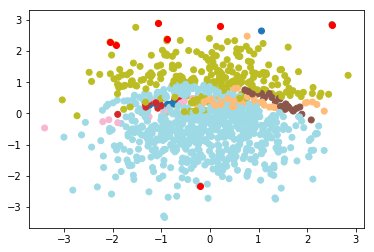

checking 621 points
[0 1 2 3 4 5 6 7]


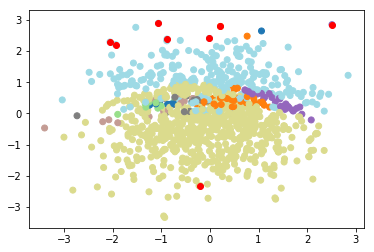

checking 677 points
[0 1 2 3 4 5 6 7 8]


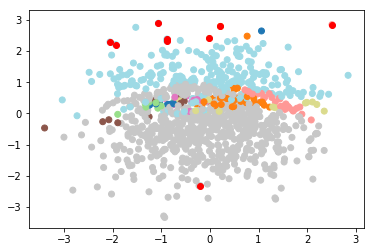

checking 801 points
[0 1 2 3 4 5 6 7 8 9]


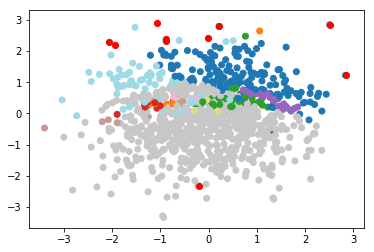

checking 859 points
[0 1 2 3 4 5 6 7 8 9]


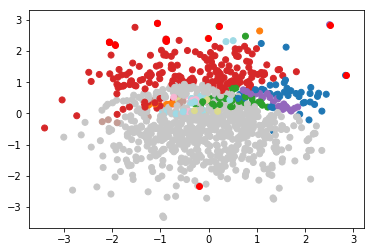

checking 471 points
[ 0  1  2  3  4  5  6  7  8  9 10]


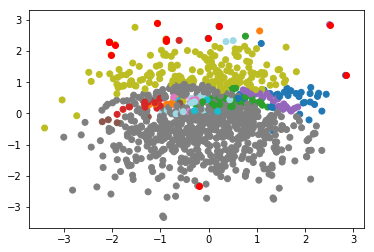

checking 547 points
[ 0  1  2  3  4  5  6  7  8  9 10 11]


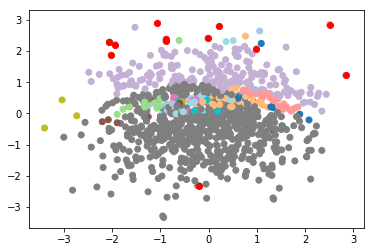

checking 661 points
[ 0  1  2  3  4  5  6  7  8  9 10 11]


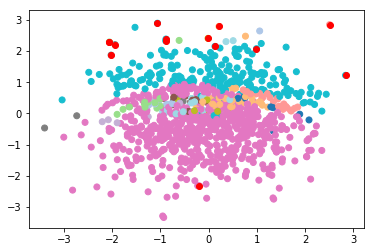

checking 756 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


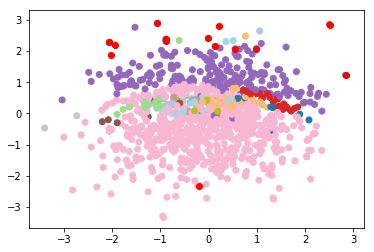

checking 819 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


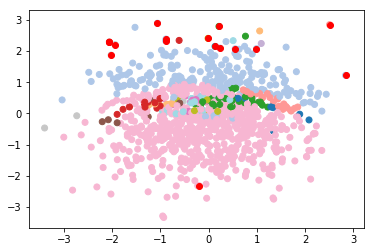

checking 982 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


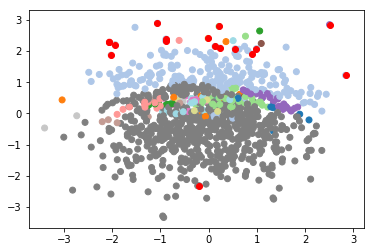

checking 1001 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


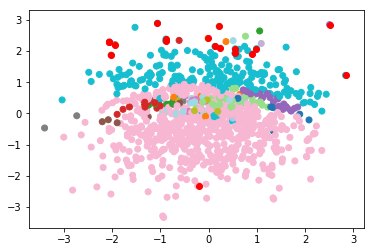

checking 1154 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


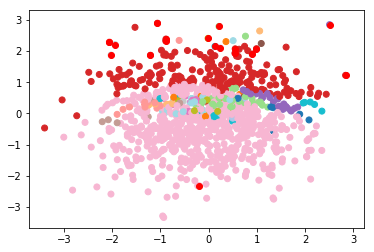

checking 1020 points
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]


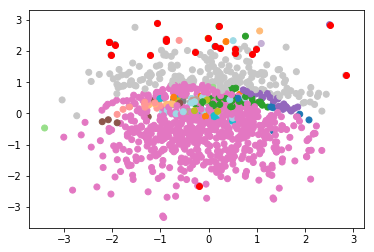

In [154]:
h = hopper(rgauss)
for i in range(20):
    h.hop()
    cells = deepcopy([str(x) for x in h.vcells])
    le = LabelEncoder()
    le.fit(cells)
    cells = le.transform(cells)
    
    #print(cells)
    print(np.unique(cells))
    plt.scatter(rgauss[:,0],rgauss[:,1],c=cells, cmap='tab20')
    plt.scatter(rgauss[h.path,0],rgauss[h.path,1],color='red')
    plt.show()

In [34]:
@interact
def grow(N=(0,100,1)):
    plt.scatter(rgauss[:,0],rgauss[:,1])
    plt.scatter(rgauss[th.path[:N],0],rgauss[th.path[:N],1])
    plt.show()

interactive(children=(IntSlider(value=50, description='N'), Output()), _dom_classes=('widget-interact',))

In [121]:


h = hopper(rgauss)
h.hop(10)
h.hop(20)

beginning traversal! 1000 items to traverse


[534,
 678,
 495,
 258,
 377,
 978,
 611,
 284,
 581,
 722,
 763,
 39,
 968,
 418,
 566,
 795,
 28,
 444,
 962,
 151,
 272,
 41,
 999,
 306,
 899,
 324,
 879,
 769,
 677,
 754]

In [11]:
[len(x) for x in h.vdict.values()]

[19,
 0,
 1,
 16,
 102,
 2,
 0,
 1,
 4,
 21,
 27,
 89,
 19,
 2,
 24,
 94,
 119,
 16,
 0,
 9,
 9,
 8,
 37,
 26,
 65,
 6,
 58,
 46,
 115,
 35]

In [14]:
smaller.obs['wt']

979     20
797      1
742      2
635     17
865    103
738      3
852      1
581      2
401      5
442     22
444     28
174     90
360     20
14       3
891     25
232     95
220    120
70      17
487      1
53      10
183     10
983      9
606     38
961     27
933     66
515      7
255     59
543     47
62     116
9       36
Name: wt, dtype: int64

Trying to set attribute `.obs` of view, making a copy.


Counter({220: 120, 62: 116, 865: 103, 232: 95, 174: 90, 933: 66, 255: 59, 543: 47, 606: 38, 9: 36, 444: 28, 961: 27, 891: 25, 442: 22, 360: 20, 979: 20, 70: 17, 635: 17, 183: 10, 53: 10, 983: 9, 515: 7, 401: 5, 14: 3, 738: 3, 581: 2, 742: 2, 487: 1, 797: 1, 852: 1})


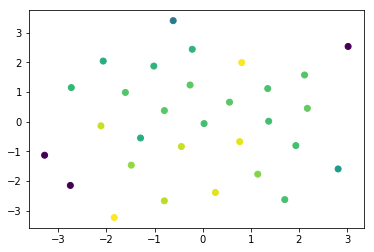

In [13]:
rgauss = sc.AnnData(rgauss)

smaller = e.compress(rgauss, h)
plt.scatter(smaller.X[:,0],smaller.X[:,1], c=h.rs)
plt.show()

In [16]:
smaller.obs['wt']

269    142
486      1
347      4
633      3
373      1
118      4
490      2
35      27
557     92
870      7
268      6
367     28
595    143
83      28
740      2
893     33
617     41
589     34
875      7
363      5
836    101
130      3
984    139
474      2
588     27
519      6
685     23
265     10
293      2
896     77
Name: wt, dtype: int64

In [11]:
sc.pp.neighbors(smaller)

/usr/local/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/usr/local/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../../../usr/local/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/usr/local/lib/python3.7/site-packages/numba/compiler.py:734: NumbaDeprecationWarning: 
Fall-back from the nopython compilation 

In [14]:
sc.tl.louvain(smaller)

In [22]:
c1=e.filter(smaller, 'louvain',['1'])

In [26]:
expanded = e.expand(c1, rgauss)

[98, 30, 680, 495, 759, 933, 463, 764, 68, 744]
[887, 132, 132, 68, 531, 155, 132, 236, 784, 764, 236, 332, 132, 220, 764, 236, 556, 531, 132, 67, 132, 784, 495, 764, 764, 220, 236, 531, 132, 132, 30, 236, 988, 67, 796, 495, 495, 887, 236, 386, 386, 132, 887, 744, 332, 495, 495, 220, 531, 764, 132, 764, 67, 796, 949, 386, 68, 887, 236, 887, 132, 531, 784, 30, 448, 495, 386, 67, 68, 764, 531, 784, 132, 67, 386, 386, 236, 386, 796, 236, 529, 236, 796, 132, 132, 764, 529, 386, 764, 556, 764, 386, 386, 796, 132, 495, 764, 236, 98, 236, 386, 495, 531, 132, 132, 236, 236, 680, 386, 236, 132, 796, 638, 132, 764, 531, 764, 463, 764, 386, 132, 887, 495, 132, 448, 764, 680, 386, 887, 236, 887, 495, 132, 132, 332, 236, 448, 495, 887, 67, 140, 764, 132, 132, 495, 796, 784, 680, 236, 531, 386, 236, 495, 764, 386, 155, 887, 933, 933, 796, 68, 332, 132, 386, 531, 67, 495, 887, 796, 495, 236, 236, 531, 289, 764, 68, 796, 332, 132, 796, 933, 386, 796, 764, 132, 949, 668, 796, 236, 495, 495, 236, 386, 2

In [19]:
list(smaller.obs['louvain'])

['0',
 '2',
 '2',
 '1',
 '0',
 '1',
 '2',
 '0',
 '2',
 '1',
 '0',
 '1',
 '0',
 '2',
 '2',
 '0',
 '1',
 '2',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '2',
 '2',
 '1',
 '1',
 '2']

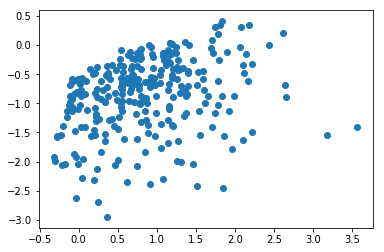

In [27]:
plt.scatter(expanded.X[:,0], expanded.X[:,1])

In [7]:
np.where([x in [1,2] for x in [1,2,3,4,5]])[0]

array([0, 1])

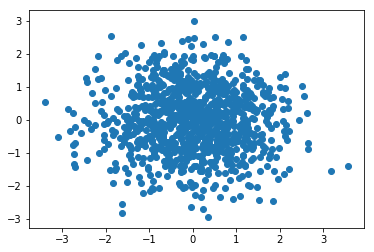

In [8]:
plt.scatter(rgauss.X[:,0],rgauss.X[:,1])